<a href="https://colab.research.google.com/github/uendercarlos/capturando-dados-de-radar-metereologico/blob/main/Radar_meteorologia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install cartopy
!pip install arm-pyart
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install netCDF4

     |████████████████████████████████| 12.1 MB 154 kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 219 kB 27.5 MB/s 
  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp37-cp37m-linux_x86_64.whl size=12516291 sha256=ed245f57cfc6fb456e076c4be9516b02bb333bf64e0f14e7983677dc6a7c3d9b
  Stored in directory: /root/.cache/pip/wheels/98/01/f7/bd10aeb96fe4b518cde5f7c4f5e12c7202f85b7353a5017847
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37324 sha256=d0ddfa02391306b90fe9890b5070ee8a1c3ba676fa763272a3b54924cc4845ff
  Stored in directory: /root/.cache/pip/wheels/43/f8/87/53c8cd41545ba20e536ea29a8fcb5431b5f477ca50d5dffbbe
Successfully built cartopy pyshp
     |████████████████████████████████| 10.9 MB 4.3 MB/s 
  Created wheel for arm-pyart: filename=arm_pyart-1.11.5-cp37-cp37m-linux_x86_64.whl size=10210405 sha256=0d8539ca6d52adb00e8a066ec7

In [ ]:
!pip install shapely pyshp
!pip install --no-binary shapely shapely --force



     |████████████████████████████████| 383 kB 4.6 MB/s 
Skipping wheel build for shapely, due to binaries being disabled for it.
  Attempting uninstall: shapely
    Found existing installation: Shapely 1.7.1
    Uninstalling Shapely-1.7.1:
      Successfully uninstalled Shapely-1.7.1
    Running setup.py install for shapely ... done
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs #biblioteca cartográfica para processamento de dados geoespaciais a fim de produzir mapas 
import pyart  #processar e analisar dados de muitos tipos de radares meteorológicos


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



/usr/local/lib/python3.7/dist-packages/yaml/constructor.py:126: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  if not isinstance(key, collections.Hashable):


In [ ]:
# Baixando o repositório do Github
!wget https://github.com/vlsantos-bit/Exemplos_radar_livro-1/archive/master.zip

--2021-08-13 02:25:59--  https://github.com/vlsantos-bit/Exemplos_radar_livro-1/archive/master.zip
Resolving github.com (github.com)... 52.69.186.44
Connecting to github.com (github.com)|52.69.186.44|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/vlsantos-bit/Exemplos_radar_livro-1/zip/master [following]
--2021-08-13 02:25:59--  https://codeload.github.com/vlsantos-bit/Exemplos_radar_livro-1/zip/master
Resolving codeload.github.com (codeload.github.com)... 192.30.255.121
Connecting to codeload.github.com (codeload.github.com)|192.30.255.121|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [    <=>             ]   1.14M  1.51MB/s    in 0.8s    

2021-08-13 02:26:01 (1.51 MB/s) - ‘master.zip’ saved [1200543]



In [ ]:
# Descompactando repositório para o Colab (arquivo formato zip)
!unzip master.zip

Archive:  master.zip
93519db7801d549ca73360ef1dec358a27447e19
   creating: Exemplos_radar_livro-1-master/
  inflating: Exemplos_radar_livro-1-master/LICENSE  
  inflating: Exemplos_radar_livro-1-master/PEL191215063034.RAWBPKC  
  inflating: Exemplos_radar_livro-1-master/README.md  
  inflating: Exemplos_radar_livro-1-master/Radar_exe1.ipynb  
  inflating: Exemplos_radar_livro-1-master/radar.png  


In [ ]:
# Abrindo e realizando a leitura do arquivo
filename = 'Exemplos_radar_livro-1-master/PEL191215063034.RAWBPKC'
radar = pyart.io.read(filename)

In [ ]:
radar.info()

altitude:
	data: <ndarray of type: float64 and shape: (1,)>
	long_name: Altitude
	standard_name: Altitude
	units: meters
	positive: up
altitude_agl: None
antenna_transition: None
azimuth:
	data: <ndarray of type: float32 and shape: (1620,)>
	units: degrees
	standard_name: beam_azimuth_angle
	long_name: azimuth_angle_from_true_north
	axis: radial_azimuth_coordinate
	comment: Azimuth of antenna relative to true north
elevation:
	data: <ndarray of type: float32 and shape: (1620,)>
	units: degrees
	standard_name: beam_elevation_angle
	long_name: elevation_angle_from_horizontal_plane
	axis: radial_elevation_coordinate
	comment: Elevation of antenna relative to the horizontal plane
fields:
	reflectivity:
		data: <ndarray of type: float32 and shape: (1620, 960)>
		units: dBZ
		standard_name: equivalent_reflectivity_factor
		long_name: Reflectivity
		coordinates: elevation azimuth range
		_FillValue: -9999.0
	velocity:
		data: <ndarray of type: float32 and shape: (1620, 960)>
		units: meters_p

fator de refletividade equivalente

/usr/local/lib/python3.7/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/10m/physical/ne_10m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/usr/local/lib/python3.7/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/10m/cultural/ne_10m_admin_1_states_provinces_lines.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


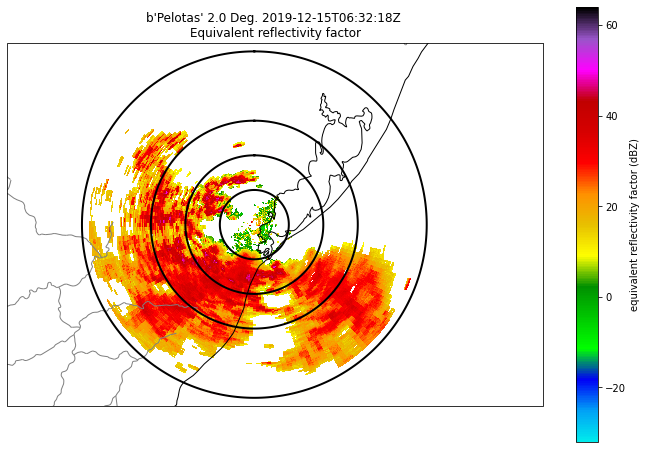

In [ ]:
# Definindo a projeção e incluindo as lat e lon de onde esta o radar.

projection = ccrs.Orthographic(
    central_longitude=radar.longitude['data'][0],
    central_latitude=radar.latitude['data'][0])

# Definindo tamanho da imagem 

fig = plt.figure(figsize = (12,8))

# Criando o gráfico de campo do radar

dc = pyart.graph.RadarMapDisplay(radar)
ax = fig.add_subplot(111, projection=projection)

# Configurando o produto de refletividade do radar atribuindo seus valores máximos e mínimos.
# Configurando lat e lon para projeção do ccrs.Orthographic 

dc.plot_ppi_map('reflectivity',3, vmin= -32, vmax=64., min_lon=-56, max_lon=-48, min_lat=-34, max_lat=-29.3, cmap='pyart_NWSRef',
                ax=ax, fig=fig, resolution='10m')

#Configurando os circulos projetados nas imagens
dc.plot_range_rings([50, 100, 150, 250])

#plotar a figura

plt.show()
#Refletividade

Velocidade radial de dispersores longe do instrumento

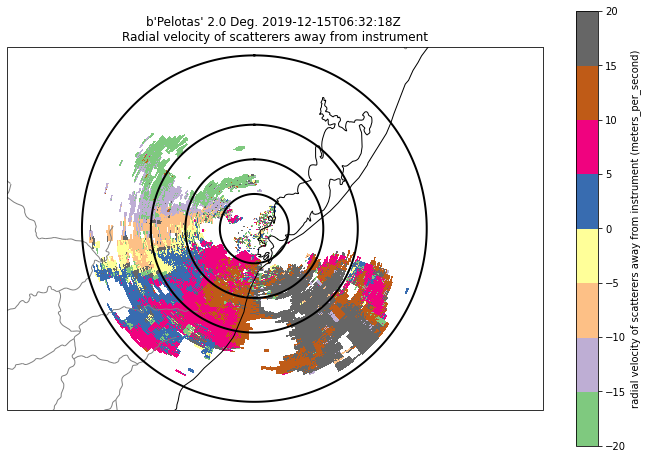

In [ ]:
# Definindo a projeção e incluindo as lat e lon de onde esta o radar.

projection = ccrs.Orthographic(
    central_longitude=radar.longitude['data'][0],
    central_latitude=radar.latitude['data'][0])

# Definindo tamanho da imagem 

fig = plt.figure(figsize = (12,8))

# Criando o gráfico de campo do radar

dc = pyart.graph.RadarMapDisplay(radar)
ax = fig.add_subplot(111, projection=projection)

# Configurando o produto de refletividade do radar atribuindo seus valores máximos e mínimos.
# Configurando lat e lon para projeção do ccrs.Orthographic 

dc.plot_ppi_map('velocity',3, vmin= -20, vmax=20., min_lon=-56, max_lon=-48, min_lat=-34, max_lat=-29.3, cmap='Accent',
                ax=ax, fig=fig, resolution='10m')

#Configurando os circulos projetados nas imagens
dc.plot_range_rings([50, 100, 150, 250])

#plotar a figura

plt.show()

/usr/local/lib/python3.7/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


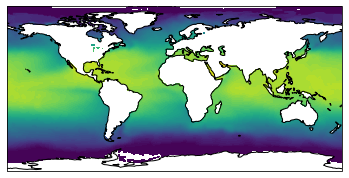

In [ ]:
import os
import matplotlib.pyplot as plt
from netCDF4 import Dataset as netcdf_dataset
import numpy as np

from cartopy import config
import cartopy.crs as ccrs


# get the path of the file. It can be found in the repo data directory.
fname = os.path.join(config["repo_data_dir"],
                     'netcdf', 'HadISST1_SST_update.nc'
                     )

dataset = netcdf_dataset(fname)
sst = dataset.variables['sst'][0, :, :]
lats = dataset.variables['lat'][:]
lons = dataset.variables['lon'][:]

ax = plt.axes(projection=ccrs.PlateCarree())

plt.contourf(lons, lats, sst, 60,
             transform=ccrs.PlateCarree())

ax.coastlines()

plt.show()

/usr/local/lib/python3.7/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


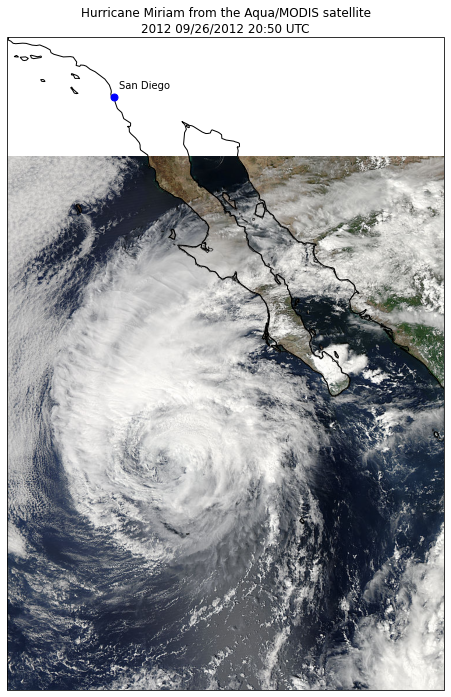

In [ ]:
import os
import matplotlib.pyplot as plt

from cartopy import config
import cartopy.crs as ccrs


fig = plt.figure(figsize=(8, 12))

# get the path of the file. It can be found in the repo data directory.
fname = os.path.join(config["repo_data_dir"],
                     'raster', 'sample', 'Miriam.A2012270.2050.2km.jpg'
                     )
img_extent = (-120.67660000000001, -106.32104523100001, 13.2301484511245, 30.766899999999502)
img = plt.imread(fname)

ax = plt.axes(projection=ccrs.PlateCarree())
plt.title('Hurricane Miriam from the Aqua/MODIS satellite\n'
          '2012 09/26/2012 20:50 UTC')

# set a margin around the data
ax.set_xmargin(0.05)
ax.set_ymargin(0.10)

# add the image. Because this image was a tif, the "origin" of the image is in the
# upper left corner
ax.imshow(img, origin='upper', extent=img_extent, transform=ccrs.PlateCarree())
ax.coastlines(resolution='50m', color='black', linewidth=1)

# mark a known place to help us geo-locate ourselves
ax.plot(-117.1625, 32.715, 'bo', markersize=7, transform=ccrs.Geodetic())
ax.text(-117, 33, 'San Diego', transform=ccrs.Geodetic())

plt.show()